<a href="https://colab.research.google.com/github/subham129/Machine-Learning-/blob/main/KMeans_Clustering_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random

In [5]:
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]

In [6]:
x,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=0)

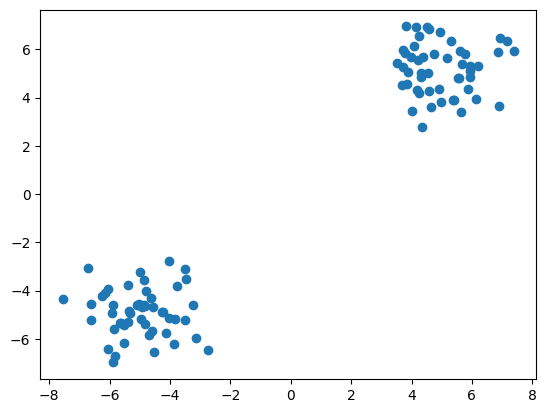

In [7]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [16]:
class KMeans():

  def __init__(self,n_clusters=2,max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,x):

    random_indices = random.sample(range(0,x.shape[0]),self.n_clusters)
    self.centroids = x[random_indices]

    for i in range(self.max_iter):

      cluster_group = self.assign_clusters(x)
      old_centroids = self.centroids

      for i in range(self.n_clusters):
        self.centroids[i] = np.mean(x[cluster_group==i],axis=0)

        if (old_centroids == self.centroids).all():
          break

    return cluster_group


  def assign_clusters(self,x):
    cluster_group = []
    distance = []

    for row in x:
      for centroid in self.centroids:
        distance.append(np.sqrt(np.dot(row-centroid,row-centroid)))
      min_dist = np.min(distance)
      index_pos = distance.index(min_dist)
      cluster_group.append(index_pos)
      distance.clear()

    return np.array(cluster_group)

  def move_centroids(self,x,cluster_group):
    new_centroids = []

    cluster_type = np.unique(cluster_group)

    for type in cluster_type:
      new_centroids.append(x[cluster_group == type].mean(axis=0))

    return np.array(new_centroids)


  def predict(self,x):
    return self.assign_clusters(x)

In [53]:
km = KMeans(n_clusters=4,max_iter=100)

In [54]:
y_means = km.fit_predict(x)

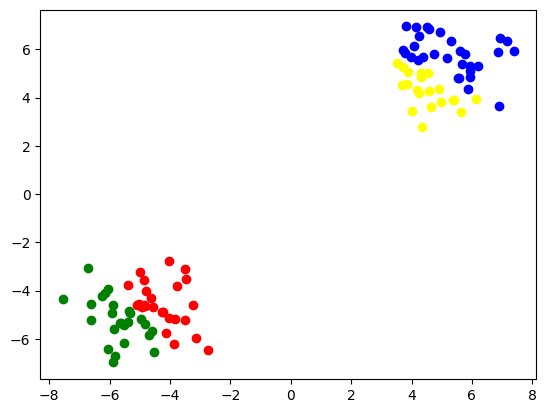

In [55]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='red')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color='blue')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],color='green')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1],color='yellow')
plt.show()